# Mortgage Risk Analyzer v2

## Intro
This is a simplification of v1.  
Goal: minimize x  
where x = expenses / housePrice  
and where expenses = payments + interest  

## Inputs
Set your input variables

In [40]:
import ipywidgets as widgets
input_sliders = [None,None,None,None,None]
input_sliders[0] = widgets.FloatSlider(
    value=3,
    min=1,
    max=10,
    step=0.01,
    description='Intrest Rate (%)',
    style={'description_width': 'initial'},
)
display(input_sliders[0])
input_sliders[1] = widgets.IntSlider(
    value=200,
    min=100,
    max=1000,
    description='House Price ($k)',
    style={'description_width': 'initial'},
)
display(input_sliders[1])
input_sliders[2] = widgets.IntSlider(
    value=50,
    min=1,
    max=100,
    description='Down Payment ($k)',
    style={'description_width': 'initial'},
)
display(input_sliders[2])
input_sliders[3] = widgets.IntSlider(
    value=30,
    min=1,
    max=60,
    description='Term (years)',
    style={'description_width': 'initial'},
)
display(input_sliders[3])
input_sliders[4] = widgets.FloatSlider(
    value=1,
    min=1,
    max=5,
    description='Payment Multiplier (%)',
    style={'description_width': 'initial'},
)
display(input_sliders[4])

FloatSlider(value=3.0, description='Intrest Rate (%)', max=10.0, min=1.0, step=0.01, style=SliderStyle(descrip…

IntSlider(value=200, description='House Price ($k)', max=1000, min=100, style=SliderStyle(description_width='i…

IntSlider(value=50, description='Down Payment ($k)', min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=30, description='Term (years)', max=60, min=1, style=SliderStyle(description_width='initial'))

FloatSlider(value=1.0, description='Payment Multiplier (%)', max=5.0, min=1.0, style=SliderStyle(description_w…

## Implementation
We will consider the following variables. Let's define a range for each.

In [41]:
variables = [
    [x / 100  for x in range(int(input_sliders[0].min), int(input_sliders[0].max), 1)],
    [x * 1000  for x in range(int(input_sliders[1].min), int(input_sliders[1].max), 1000)],
    [x * 1000  for x in range(int(input_sliders[2].min), int(input_sliders[2].max), 100)],
    [x for x in range(int(input_sliders[3].min), int(input_sliders[3].max), 1)],
    [x for x in range(int(input_sliders[4].min), int(input_sliders[4].max), 1)],
]

This function calculates x. It goes through each month and calculates the monthly payment amount, & intrest.

In [42]:
def calculateX(intrestRate, housePrice, downPayment, term, minPaymentMuliplyer):
    n = 12*term
    monthlyInterestRate = intrestRate / 12
    r = 1/(1+monthlyInterestRate)
    loan = housePrice - downPayment
    minPayment = loan * ((1-r)/(r-r**(n+1)))
    payment = minPayment * minPaymentMuliplyer
    paymentSum = 0
    while loan > 1:
        # 1 month passes
        interest = loan * monthlyInterestRate
        
        p = payment
        if interest + loan < payment:
            p = interest + loan
        
        loan = loan - p + interest
        paymentSum += p
    expenses = paymentSum + downPayment
    x = expenses / housePrice
    return x
    
        

In [43]:
import matplotlib.pyplot as plt
def graph(x,y,xlabel):
    plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel('x')
    plt.plot(x, y, '-ok')
    plt.show()

## Execution
Now lets go through each variable and calculate x for each. See the graphs output below.

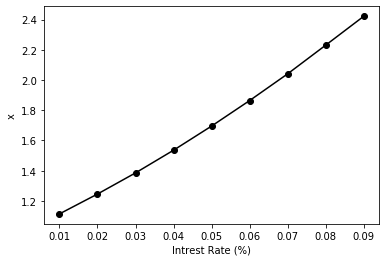

In [ ]:
for i,var in enumerate(variables):
    a = input_sliders[0].value
    b = input_sliders[1].value
    c = input_sliders[2].value
    d = input_sliders[3].value
    e = input_sliders[4].value
    output = []
    xlabel = ''
    for v in var:
        if i == 0:
            a = v
            xlabel = 'Intrest Rate (%)'
        if i == 1:
            b = v
            xlabel = 'Home Price ($)'
        if i == 2:
            c = v
            xlabel = 'Down Payment (%)'
        if i == 3:
            d = v
            xlabel = 'Term (years)'
        if i == 4:
            e = v
            xlabel = 'Minimum Payment Multiplyer'
        output.append(calculateX(a,b,c,d,e))
    graph(var, output, xlabel)

## Interpretation
1. There is a positive relationship between x and interest rate as expected. Example:  
intrest rate of 5% vs 7% assuming house price of \\$500,000  
If interest rate = 5%, then x = 1.2. If x = 1.2, then this means than the adjusted house price is \\$600k  
If interest rate = 7%, then x = 1.25. If x = 1.25, then this means than the adjusted house price is \\$625k  
Therefore 2% increase in interest rate roughfly equals an increase of \\$25k that we would have to pay.  

2. There is no relationship between x and home price, meaning that the ratio of "Adjusted House Price" to "House Price" remains constant as House Price changes.

3. There is a linear relationship between x and down payment, and term.

4. The most interesting find is the last graph. There seems to be an inverse relationship between x and the "Minimum Payment Multiplyer". This means that if one can pay twice the minimum payment per month, there are large savings. However, the difference between twice the minimum payment per month and tree times the minimum payment per month is not as much. See below for an example of this analysis.

In [9]:
housePrice = 500000
print('If a house costs '+str(housePrice))

intrestRate = 0.05
downPayment = housePrice * 0.20
term = 30
taxRate = 0.30
minPaymentMuliplyer = 1
option1 = calculateX(intrestRate, housePrice, downPayment, term, taxRate, minPaymentMuliplyer) # the lesw better option
print('Option 1 x = '+str(option1))

minPaymentMuliplyer = 2
option2 = calculateX(intrestRate, housePrice, downPayment, term, taxRate, minPaymentMuliplyer) # the better option
print('Option 2 x = '+str(option2))

diff = option1 - option2
dollarsDiff = housePrice * diff
print('Option 2 is $'+str(round(dollarsDiff,2))+' more than Option 1')

If a house costs 500000
Option 1 x = 1.5222323919924534
Option 2 x = 1.1502159810905208
Option 2 is $186008.21 more than Option 1


## Conclusion
So if you can pay 2 times the minimum monthly amount, then you save \\$186k on a \\$500k house. There are many other assumptions I didn't consider. But this is a start.